Sometimes (as in this case) you'll have to show your results on the same notebook you run the algorythms, usually for time constrains.
In those cases we can use the old trick: html code.

The function HTMLDisplay() allows to visualize HTML code, including Javascript, D3, SVG and many more.
To do so, we need a cluster and execute the html interpreter.

In [1]:
from IPython.core.display import HTML

HTML("""
<h1>HTML Way</h1>
<h2>This is the way....</h2>

<p>Using html in a jupyter notebook is a clean way to present results in a more attractive way.</p>
<p>It's easy and has a lot of possibilities, even displaying images or generating them:</p>
<h3>Image</h3>
 <img src="https://upload.wikimedia.org/wikipedia/commons/thumb/e/e4/HTML_logo.png/250px-HTML_logo.png" alt="HTML Code">

<h3>svg</h3>
<svg width="600" height="200">
   <circle cx="100" cy="100" r="50" stroke="#4054b2" stroke-width="2" fill="black" />
   <circle cx="100" cy="100" r="10" stroke-width="0" fill="white" />
   <circle cx="300" cy="100" r="50" stroke="#4054b2" stroke-width="2" fill="black" />
   <circle cx="300" cy="100" r="10" stroke-width="0" fill="white" />
   <path d="M100,160 Q200,200 300,160" stroke="#4054b2" stroke-width="6" stroke-linecap="round" fill="none"/>
   Sorry, your browser does not support inline SVG.
</svg>
""")

In [2]:
HTML("""
<h2>Inline tags are supported too, so you can modify the aspect of the words:</h2>
<b>Bold</b>
<br>
<i>Italic</i>
<br>
<mark>Marked</mark>
<br>
<del>Deleted</del>
<br>
<ins>Inserted</ins>
<br>
TEXT<sub>Subscript</sub>
<br>
TEXT<sup>Superscript</sup>
""")

In [3]:
HTML("""
<h2>Limitations</h2>
<ul>
  <li>The maximum size for a notebook cell, including contents and output, is 16MB. Make sure that the size of the HTML you pass to the displayHTML function does not exceed this value.</li>
  <li>When linking to external resources, use https:// instead of http://. Otherwise, graphics, images, or Javascript might not render correctly due to mixed content errors.</li>
</ul>
""")

In [4]:
message1 = "We are still in a python enviroment, so remember you can set conditionals and operators:"
condition = True

if condition == True:
  message2 = "Condition was <b>" + str(condition) + str('</b>. Nice!')
else:
  message2 = "Condition was <b>" + str(condition) + "</b>. Bad!"

phrase = message1 + '<br><br>' + message2

HTML( """{} """.format(phrase))

##3D Interactive plot...
Needs some minor tweaks to work in colab.


In [13]:
!pip install mpld3
!pip install matplotlib==3.2.2
!pip install ipympl
# TO SHOW INTERACTIVE PLOTS
%matplotlib widget
from google.colab import output
output.enable_custom_widget_manager()


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 511.6/511.6 kB 5.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.6/11.6 MB 27.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 40.9 MB/s eta 0:00:00
  Attempting uninstall: matplotlib
    Found existing installation: matplotlib 3.2.2
    Uninstalling matplotlib-3.2.2:
      Successfully uninstalled matplotlib-3.2.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
lida 0.0.10 requires fastapi, which is not installed.
lida 0.0.10 requires kaleido, which is not installed.
lida 0.0.10 requires python-multipart, which is not installed.
lida 0.0.10 requires uvicorn, which is not installed.


[[ 4.68317832  4.43386998  4.49966903]
 [ 0.61145131  1.17801426  1.02140435]
 [ 3.04479597 10.02147199 10.28830697]]
Number of estimated clusters: 3


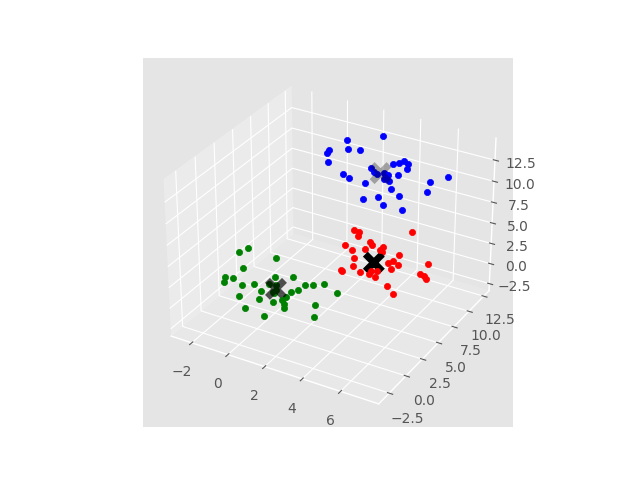

In [14]:
import numpy as np
from sklearn.cluster import MeanShift
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import style
style.use("ggplot")
centers = [[1,1,1],[5,5,5],[3,10,10]]
X, _ = make_blobs(n_samples = 100, centers = centers, cluster_std = 1.5)
ms = MeanShift()
ms.fit(X)
labels = ms.labels_
cluster_centers = ms.cluster_centers_
print(cluster_centers)
n_clusters_ = len(np.unique(labels))
print("Number of estimated clusters:", n_clusters_)
colors = 10*['r','g','b','c','k','y','m']
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
for i in range(len(X)):
    ax.scatter(X[i][0], X[i][1], X[i][2], c=colors[labels[i]], marker='o')
ax.scatter(cluster_centers[:,0],cluster_centers[:,1],cluster_centers[:,2],
            marker="x",color='k', s=150, linewidths = 5, zorder=10)